In [1]:
soils_data = "/home/alex/data/tanzania_soils.geojson"

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

http://geoportal.icpac.net/layers/geonode%3Atza_tanzania_soil

In [2]:
soils_gdf = gpd.read_file(soils_data)

In [3]:
soils_gdf.head()

,id,AREA,PERIMETER,SOIL_TYPE,MAIN_TYPE,geometry
0,tza_tanzania_soil.1,0.692150,6.306691,FRh16,Haplic Ferrasols,"MULTIPOLYGON (((30.87991 -0.99773, 30.88583 -1..."
1,tza_tanzania_soil.2,0.059940,1.229692,FRh16,Haplic Ferrasols,"MULTIPOLYGON (((30.87991 -0.99773, 30.88494 -0..."
2,tza_tanzania_soil.3,2.828082,24.574560,WATER,,"MULTIPOLYGON (((34.08033 -1.02465, 34.09883 -1..."
3,tza_tanzania_soil.4,0.004537,0.324509,FRh16,Haplic Ferrasols,"MULTIPOLYGON (((31.53766 -0.99466, 31.54113 -0..."
4,tza_tanzania_soil.17,0.012457,0.858524,VRe9,Eutric Vertisols,"MULTIPOLYGON (((33.88071 -1.47768, 33.87746 -1..."


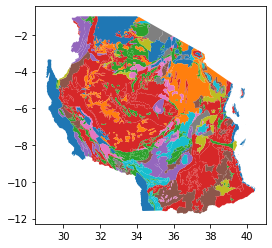

In [4]:
soils_gdf.plot("MAIN_TYPE")

https://data.humdata.org/dataset/2012-census-tanzania-wards-shapefiles

In [2]:
wards_data = "/home/alex/data/2012 Wards Shapefiles/TZwards.shp"
wards_gdf = gpd.read_file(wards_data)
wards_gdf.head()

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93715 -4.59737, 35.93632 -4.59956..."
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93456 -4.61214, 35.93301 -4.61637..."
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92014 -4.74797, 35.92617 -4.74806..."
3,01,Dodoma,01,Kondoa,051,Kalamba,None,0.678941,0.023225,"POLYGON ((35.88398 -4.78581, 35.88743 -4.78581..."
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33663 -4.84585, 36.33696 -4.84824..."


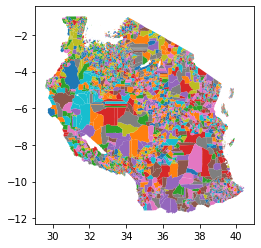

In [6]:
wards_gdf.plot("Ward_Name")

In [3]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

In [4]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    
    # return the wrangled dataframe
    return X


In [10]:
import geopandas as gpd

In [5]:
wards_gdf = gpd.read_file("/home/alex/data/2012 Wards Shapefiles/TZwards.shp")

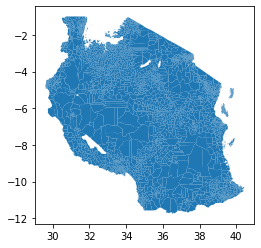

In [12]:
wards_gdf.plot()

In [14]:
wards_gdf.head()

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93715 -4.59737, 35.93632 -4.59956..."
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93456 -4.61214, 35.93301 -4.61637..."
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92014 -4.74797, 35.92617 -4.74806..."
3,01,Dodoma,01,Kondoa,051,Kalamba,None,0.678941,0.023225,"POLYGON ((35.88398 -4.78581, 35.88743 -4.78581..."
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33663 -4.84585, 36.33696 -4.84824..."


In [17]:
len(wards_gdf["Ward_Name"].unique())

3385

In [18]:
len(wards_gdf)

3644

In [11]:
boundaries = "/home/alex/data/2012 Wards Shapefiles/TZwards.shp"

raster_folder = "/home/alex/data/CHIRPS-africa-monthly/"

statistic_of_interest = "mean"

identifier_column = "Ward_Name"

file_prefix = "chirps-v2.0."

file_type_of_interest = ".tif"

output_csv = "/home/alex/data/tanzania-pumps-rasterstats/tanzania_wards_chirps.csv"


In [1]:
import os

import glob 

import numpy as np

import rasterio 

from rasterstats import zonal_stats

import pandas as pd

import geopandas as gpd

import multiprocessing

from datetime import datetime

In [12]:
results = {}

os.chdir(raster_folder)

def processing(name): 
    
    result = zonal_stats(boundaries, name, stats=[statistic_of_interest], nodata=-9999, all_touched=True, geojson_out=False) 
    
    return (name, result)  

start = datetime.now()

with multiprocessing.Pool(multiprocessing.cpu_count()) as pool: 
    
    for name, result in pool.map(processing, glob.glob("*" + file_type_of_interest)): 
        
        results[name] = result
    
value_list = []

for i in range(len(list(results.values()))):
    
    for j in range(len(list(results.values())[i])):
        
        value_list.append(list(list(results.values())[i][j].values()))
        
key_list = []

for i in range(len(list(results.values()))):
    
    for j in range(len(list(results.values())[i])):
        
        key_list.append(list(results.keys())[i])
        
cleaned_outputs = pd.DataFrame(np.array(value_list), index=key_list, columns = [statistic_of_interest])

cleaned_outputs = cleaned_outputs.reset_index()

cleaned_outputs["Date"] = pd.to_datetime(cleaned_outputs["index"].str.split(file_prefix).str[1].str.split(file_type_of_interest).str[0].str.replace(".","-"))

cleaned_outputs = cleaned_outputs.drop("index", axis=1)

cleaned_outputs[identifier_column] = pd.Series(np.tile(gpd.read_file(boundaries)[identifier_column].unique().tolist(), len([name for name in os.listdir(raster_folder) if os.path.isfile(os.path.join(raster_folder, name))])))

cleaned_outputs = cleaned_outputs.sort_values(by="Date").set_index("Date")

cleaned_outputs.to_csv(output_csv)

stop = datetime.now()

print("Execution time for\n\nMulticore, multi-band, multi-polygon zonal statistics\n\n{}".format(str(stop - start)))

Execution time for

Multicore, multi-band, multi-polygon zonal statistics

0:15:47.132712


In [13]:
boundaries = "/home/alex/data/2012 Wards Shapefiles/TZwards.shp"

raster_folder = "/home/alex/data/chirts/"

statistic_of_interest = "mean"

identifier_column = "Ward_Name"

file_prefix = "CHIRTSmax."

file_type_of_interest = ".tif"

output_csv = "/home/alex/data/tanzania-pumps-rasterstats/tanzania_wards_chirts.csv"


In [14]:
results = {}

os.chdir(raster_folder)

def processing(name): 
    
    result = zonal_stats(boundaries, name, stats=[statistic_of_interest], nodata=-9999, all_touched=True, geojson_out=False) 
    
    return (name, result)  

start = datetime.now()

with multiprocessing.Pool(multiprocessing.cpu_count()) as pool: 
    
    for name, result in pool.map(processing, glob.glob("*" + file_type_of_interest)): 
        
        results[name] = result
    
value_list = []

for i in range(len(list(results.values()))):
    
    for j in range(len(list(results.values())[i])):
        
        value_list.append(list(list(results.values())[i][j].values()))
        
key_list = []

for i in range(len(list(results.values()))):
    
    for j in range(len(list(results.values())[i])):
        
        key_list.append(list(results.keys())[i])
        
cleaned_outputs = pd.DataFrame(np.array(value_list), index=key_list, columns = [statistic_of_interest])

cleaned_outputs = cleaned_outputs.reset_index()

cleaned_outputs["Date"] = pd.to_datetime(cleaned_outputs["index"].str.split(file_prefix).str[1].str.split(file_type_of_interest).str[0].str.replace(".","-"))

cleaned_outputs = cleaned_outputs.drop("index", axis=1)

cleaned_outputs[identifier_column] = pd.Series(np.tile(gpd.read_file(boundaries)[identifier_column].unique().tolist(), len([name for name in os.listdir(raster_folder) if os.path.isfile(os.path.join(raster_folder, name))])))

cleaned_outputs = cleaned_outputs.sort_values(by="Date").set_index("Date")

cleaned_outputs.to_csv(output_csv)

stop = datetime.now()

print("Execution time for\n\nMulticore, multi-band, multi-polygon zonal statistics\n\n{}".format(str(stop - start)))


Execution time for

Multicore, multi-band, multi-polygon zonal statistics

0:14:05.716145


In [62]:
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


# Split train into train & val
#train, validate = train_test_split(
 #   train, 
  #  train_size=0.80, 
   # test_size=0.20, 
    #stratify=train['status_group'], 
    #random_state=42)

In [18]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [21]:
train_gdf = gpd.GeoDataFrame(train, geometry=gpd.points_from_xy(train.longitude, train.latitude))
test_gdf = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(test.longitude, test.latitude))

In [22]:
train_gdf.crs = "EPSG:4326"
test_gdf.crs = "EPSG:4326"

In [23]:
wards_gdf.head()

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93715 -4.59737, 35.93632 -4.59956..."
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93456 -4.61214, 35.93301 -4.61637..."
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92014 -4.74797, 35.92617 -4.74806..."
3,01,Dodoma,01,Kondoa,051,Kalamba,None,0.678941,0.023225,"POLYGON ((35.88398 -4.78581, 35.88743 -4.78581..."
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33663 -4.84585, 36.33696 -4.84824..."


In [24]:
wards_gdf.crs

{'init': 'epsg:4210'}

In [25]:
wards_gdf_prj = wards_gdf.to_crs("EPSG:4326")

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [26]:
train_join = gpd.sjoin(train_gdf, wards_gdf_prj, how="left")
test_join = gpd.sjoin(test_gdf, wards_gdf_prj, how="left")

In [32]:
train_clean = train_join.drop(["geometry","SHAPE_Area","SHAPE_Leng", "index_right"], axis=1)
test_clean = test_join.drop(["geometry","SHAPE_Area","SHAPE_Leng", "index_right"], axis=1)

In [35]:
train_key = train_clean[["id","Region_Cod","Region_Nam","District_C","District_N","Ward_Code","Ward_Name","Division"]]
test_key = test_clean[["id","Region_Cod","Region_Nam","District_C","District_N","Ward_Code","Ward_Name","Division"]]

In [37]:
train_key.to_csv("/home/alex/data/tanzania-pumps-rasterstats/train_wards.csv")

test_key.to_csv("/home/alex/data/tanzania-pumps-rasterstats/test_wards.csv")

In [ ]:
results = point_query()

In [7]:
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


In [81]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [70]:
# Correct elevation data

In [71]:
test_elev = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/test_srtm_elevation.csv")
train_elev = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/train_srtm_elevation.csv")

In [87]:
train_merge_1 = train.merge(train_elev, on="id").drop(["gps_height"], axis=1)
test_merge_1 = test.merge(test_elev, on="id").drop(["gps_height"], axis=1)

In [75]:
# Link IDs with Wards

In [9]:
train_wards = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/train_wards.csv")
test_wards = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/test_wards.csv")

In [10]:
train_merge_1 = train.merge(train_wards, on="id")
test_merge_1 = train.merge(test_wards, on="id")

In [90]:
train_merge_2.head()

,id,amount_tsh,date_recorded,funder,installer,longitude_x,latitude_x,wpt_name,num_private,basin,...,longitude_y,elevation,Unnamed: 0_y,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division
0,69572,6000.0,2011-03-14,Roman,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,34.938093,1386.0,0,22.0,Njombe,5.0,Ludewa,101.0,Mundindi,NaN
1,8776,0.0,2013-03-06,Grumeti,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,34.698766,1442.0,1,20.0,Mara,2.0,Serengeti,101.0,Ikoma,Grumeti
2,34310,25.0,2013-02-25,Lottery Club,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,37.460664,698.0,2,21.0,Manyara,4.0,Simanjiro,101.0,Ngorika,NaN
3,67743,0.0,2013-01-28,Unicef,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,38.486161,262.0,3,9.0,Mtwara,6.0,Nanyumbu,111.0,Nanyumbu,Nanyumbu
4,19728,0.0,2011-07-13,Action In A,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,31.130847,1673.0,4,18.0,Kagera,1.0,Karagwe,131.0,Nyakasimbi,Nyaishozi


In [4]:
import pandas as pd

In [91]:
# Merge with climate data

In [20]:
wards_chirps = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/tanzania_wards_chirps.csv")
wards_chirts = pd.read_csv("/home/alex/data/tanzania-pumps-rasterstats/tanzania_wards_chirts.csv")

In [ ]:
train_merge_2 = train_merge_1.merge(wards_chirps, on="Ward_Name")
test_merge_2 = test_merge_1.merge(wards_chirps, on="Ward_Name")

In [ ]:
wards_chirps.set_index(pd.to_datetime(wards_chirps["Date"]))["mean"].resample("A")

In [ ]:
train = wrangle(train)
test = wrangle(test)

In [247]:
train.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'longitude_MISSING', 'latitude_MISSING',
       'construction_year_MISSING', 'gps_height_MISSING', 'population_MISSING',
       'year_recorded', 'month_recorded', 'day_recorded', 'years',
       'years_MISSING'],
      dtype='object')

In [204]:
train["population"].value_counts(dropna=False)

NaN       17066
1.0        5627
200.0      1553
150.0      1509
250.0      1357
          ...  
1942.0        1
1619.0        1
765.0         1
770.0         1
519.0         1
Name: population, Length: 986, dtype: int64

In [21]:
train.groupby("status_group")["lga"].value_counts().unstack()

lga,Arusha Rural,Arusha Urban,Babati,Bagamoyo,Bahi,Bariadi,Biharamulo,Bukoba Rural,Bukoba Urban,Bukombe,...,Tabora Urban,Tandahimba,Tanga,Tarime,Temeke,Tunduru,Ukerewe,Ulanga,Urambo,Uyui
status_group,,,,,,,,,,,,,,,,,,,,,
functional,691.0,34.0,306.0,581.0,130.0,458.0,227.0,179.0,35.0,242.0,...,45.0,62.0,34.0,98.0,58.0,180.0,77.0,360.0,126.0,111.0
functional needs repair,38.0,7.0,44.0,1.0,NaN,325.0,18.0,82.0,7.0,44.0,...,NaN,12.0,3.0,NaN,3.0,43.0,59.0,26.0,13.0,6.0
non functional,268.0,13.0,64.0,215.0,58.0,148.0,90.0,130.0,29.0,118.0,...,79.0,139.0,47.0,70.0,113.0,108.0,150.0,161.0,173.0,150.0


In [24]:
train["gps_height"].value_counts(dropna=False)

 NaN       16305
-15.0         48
 1290.0       45
-20.0         43
-14.0         43
           ...  
 2306.0        1
 649.0         1
 2232.0        1
 2312.0        1
 2220.0        1
Name: gps_height, Length: 2401, dtype: int64

In [27]:
tif = "/home/alex/Downloads/Tanzania_SRTM30meters/Tanzania_SRTM30meters.tif"

In [7]:
import itertools
import multiprocessing

from rasterstats import point_query, zonal_stats
import fiona

In [30]:
train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'longitude_MISSING', 'latitude_MISSING',
       'construction_year_MISSING', 'gps_height_MISSING', 'population_MISSING',
       'year_recorded', 'month_recorded', 'day_recorded', 'years',
       'years_MISSING'],
      dtype='object')

In [38]:
TRAIN_pump_locations = train[["latitude","longitude", "id"]]

In [39]:
TRAIN_pump_locations = gpd.GeoDataFrame(TRAIN_pump_locations, geometry=gpd.points_from_xy(TRAIN_pump_locations.longitude, TRAIN_pump_locations.latitude))

In [40]:
TRAIN_pump_locations.head()

,latitude,longitude,id,geometry
0,-9.856322,34.938093,69572,POINT (34.93809 -9.85632)
1,-2.147466,34.698766,8776,POINT (34.69877 -2.14747)
2,-3.821329,37.460664,34310,POINT (37.46066 -3.82133)
3,-11.155298,38.486161,67743,POINT (38.48616 -11.15530)
4,-1.825359,31.130847,19728,POINT (31.13085 -1.82536)


In [41]:
#VALIDATE_pump_locations = validate[["latitude","longitude", "id"]]
#VALIDATE_pump_locations = gpd.GeoDataFrame(VALIDATE_pump_locations, geometry=gpd.points_from_xy(VALIDATE_pump_locations.longitude, VALIDATE_pump_locations.latitude))
#VALIDATE_pump_locations.head()

In [42]:
TEST_pump_locations = test[["latitude","longitude", "id"]]
TEST_pump_locations = gpd.GeoDataFrame(TEST_pump_locations, geometry=gpd.points_from_xy(TEST_pump_locations.longitude, TEST_pump_locations.latitude))
TEST_pump_locations.head()

,latitude,longitude,id,geometry
0,-4.059696,35.290799,50785,POINT (35.29080 -4.05970)
1,-3.309214,36.656709,51630,POINT (36.65671 -3.30921)
2,-5.004344,34.767863,17168,POINT (34.76786 -5.00434)
3,-9.418672,38.058046,45559,POINT (38.05805 -9.41867)
4,-10.950412,35.006123,49871,POINT (35.00612 -10.95041)


In [43]:
TRAIN_pump_locations = TRAIN_pump_locations[TRAIN_pump_locations["latitude"].notna()]
#VALIDATE_pump_locations = VALIDATE_pump_locations[VALIDATE_pump_locations["latitude"].notna()]
TEST_pump_locations = TEST_pump_locations[TEST_pump_locations["latitude"].notna()]

In [45]:
TRAIN_pump_locations.crs = "EPSG:4326"
#VALIDATE_pump_locations.crs = "EPSG:4326"
TEST_pump_locations.crs = "EPSG:4326"

In [46]:
TRAIN_pump_locations.to_file("/home/alex/data/tanzania-pumps-rasterstats/tanzania_pump_locations_TRAIN.shp")
#VALIDATE_pump_locations.to_file("/home/alex/data/tanzania_pump_locations_VALIDATE.shp")
TEST_pump_locations.to_file("/home/alex/data/tanzania-pumps-rasterstats/tanzania_pump_locations_TEST.shp")

In [49]:
import rasterio

In [50]:
rasterio.open(tif).crs

CRS.from_epsg(4326)

In [47]:
TRAIN_shp = "/home/alex/data/tanzania-pumps-rasterstats/tanzania_pump_locations_TRAIN.shp"
#VALIDATE_shp = "/home/alex/data/tanzania_pump_locations_VALIDATE.shp"
TEST_shp = "/home/alex/data/tanzania-pumps-rasterstats/tanzania_pump_locations_TEST.shp"



In [50]:
from rasterstats import point_query

In [54]:
tif = "/home/alex/data/Tanzania_SRTM30meters/Tanzania_SRTM30meters.tif"

In [55]:
TRAIN_results = point_query(TRAIN_shp, tif, interpolate="nearest")
#VALIDATE_results = point_query(VALIDATE_shp, tif, interpolate="nearest")
TEST_results = point_query(TEST_shp, tif, interpolate="nearest")

In [56]:
TRAIN_pump_locations["elevation"] = TRAIN_results

#VALIDATE_pump_locations["elevation"] = VALIDATE_results

TEST_pump_locations["elevation"] = TEST_results


In [57]:
TRAIN_pump_locations.head()

,latitude,longitude,id,geometry,elevation
0,-9.856322,34.938093,69572,POINT (34.93809 -9.85632),1386.0
1,-2.147466,34.698766,8776,POINT (34.69877 -2.14747),1442.0
2,-3.821329,37.460664,34310,POINT (37.46066 -3.82133),698.0
3,-11.155298,38.486161,67743,POINT (38.48616 -11.15530),262.0
4,-1.825359,31.130847,19728,POINT (31.13085 -1.82536),1673.0


In [59]:
TRAIN_pump_locations.drop(["geometry"], axis=1).to_csv("/home/alex/data/tanzania-pumps-rasterstats/train_srtm_elevation.csv")
TEST_pump_locations.drop(["geometry"], axis=1).to_csv("/home/alex/data/tanzania-pumps-rasterstats/test_srtm_elevation.csv")

In [61]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geometry
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,POINT (34.93809 -9.85632)
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (34.69877 -2.14747)
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,POINT (37.46066 -3.82133)
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,POINT (38.48616 -11.15530)
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (31.13085 -1.82536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,POINT (37.16981 -3.25385)
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,POINT (35.24999 -9.07063)
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,POINT (34.01709 -8.75043)
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,POINT (35.86132 -6.37857)


In [85]:
 from mpl_toolkits.axes_grid1 import make_axes_locatable

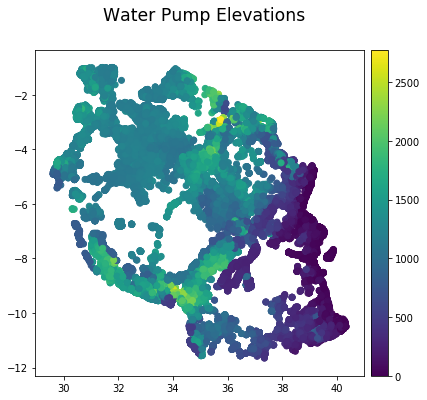

In [175]:
fig, ax = plt.subplots(figsize=(8,6))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

TRAIN_pump_locations.plot("elevation", legend=True, ax=ax, cax=cax)
VALIDATE_pump_locations.plot("elevation", ax=ax, cax=cax)

TEST_pump_locations.plot("elevation",  ax=ax, cax=cax)

plt.suptitle("Water Pump Elevations", size="xx-large")
    
plt.savefig("water-pump-elevations", dpi=300)

In [104]:
train.shape

(47520, 46)

In [251]:
train_merged = train.merge(TRAIN_pump_locations, how="left")
validate_merged = validate.merge(VALIDATE_pump_locations, how="left")
test_merged = test.merge(TEST_pump_locations, how="left")

In [252]:
train.shape, train_merged.shape

((47520, 47), (47520, 49))

In [179]:
train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
43360,72938,0.0,NaN,NaN,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,...,False,False,True,True,True,2011,7,27,NaN,True
7263,65358,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,...,False,False,False,False,False,2011,3,23,3.0,False
2486,469,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,...,False,False,False,False,False,2011,3,7,1.0,False
313,1298,0.0,Government Of Tanzania,NaN,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,...,False,False,True,True,True,2011,7,31,NaN,True
52726,27001,0.0,Water,NaN,Gove,35.389331,-6.399942,Chama,0,Internal,...,False,False,True,True,True,2011,3,10,NaN,True


In [239]:
train_merged.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING,geometry,elevation
0,72938,0.0,NaN,NaN,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,...,True,True,True,2011,7,27,NaN,True,POINT (33.54290 -9.17478),1351.0
1,65358,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,...,False,False,False,2011,3,23,3.0,False,POINT (34.66576 -9.30855),2061.0
2,469,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,...,False,False,False,2011,3,7,1.0,False,POINT (38.23857 -6.17992),329.0
3,1298,0.0,Government Of Tanzania,NaN,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,...,True,True,True,2011,7,31,NaN,True,POINT (30.71673 -1.28905),1369.0
4,27001,0.0,Water,NaN,Gove,35.389331,-6.399942,Chama,0,Internal,...,True,True,True,2011,3,10,NaN,True,POINT (35.38933 -6.39994),904.0


In [254]:
train_merged.shape

(47520, 49)

In [287]:
wpgdf = wards_pop_gdf[["Ward_Name", "total_both", "total_male", "total_fema","rural_both","rural_male","rural_fema","urban_both","urban_male","urban_fema","ward_type","Pop_Den"]]

In [293]:
train_merged_pop = train_merged.merge(wpgdf, right_on="Ward_Name", left_on="ward", how="left").drop_duplicates("id")
train_merged_pop.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,total_male,total_fema,rural_both,rural_male,rural_fema,urban_both,urban_male,urban_fema,ward_type,Pop_Den
0,72938,0.0,NaN,NaN,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,...,11936.0,13308.0,16699.0,7972.0,8727.0,8545.0,3964.0,4581.0,Mixed,271.0
1,65358,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,...,3993.0,4536.0,8529.0,3993.0,4536.0,0.0,0.0,0.0,Rural,46.0
2,469,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,...,7029.0,7480.0,9384.0,4647.0,4737.0,5125.0,2382.0,2743.0,Mixed,28.0
4,1298,0.0,Government Of Tanzania,NaN,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,...,8040.0,8665.0,16705.0,8040.0,8665.0,0.0,0.0,0.0,Rural,82.0
5,27001,0.0,Water,NaN,Gove,35.389331,-6.399942,Chama,0,Internal,...,7344.0,8025.0,15369.0,7344.0,8025.0,0.0,0.0,0.0,Rural,15.0


In [295]:
train_merged_pop.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'longitude_MISSING', 'latitude_MISSING',
       'construction_year_MISSING', 'gps_height_MISSING', 'population_MISSING',
       'year_recorded', 'month_recorded', 'day_recorded', 'years',
       'years_MISSING', 'geometry', 'elevation', 'Ward_Name', 'total_both',
       'total_male', 'total_fema', 'rural_both', 'rural_male', 'rural_fema',
       'urban_both', 'urban_male', 'urban_fema'

In [294]:
validate_merged_pop = validate_merged.merge(wpgdf, right_on="Ward_Name", left_on="ward", how="left").drop_duplicates("id")
test_merged_pop = test_merged.merge(wpgdf, right_on="Ward_Name", left_on="ward", how="left").drop_duplicates("id")


In [296]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train_merged_pop.drop(columns=[target, "id", "gps_height", "geometry", "population"])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality<=50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features 

In [297]:
features

['amount_tsh',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'years',
 'elevation',
 'total_both',
 'total_male',
 'total_fema',
 'rural_both',
 'rural_male',
 'rural_fema',
 'urban_both',
 'urban_male',
 'urban_fema',
 'Pop_Den',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING',
 'ward_type']

In [299]:
# Arrange data into X features matrix and y target vector 
X_train = train_merged_pop[features]
y_train = train_merged_pop[target]
X_validate = validate_merged_pop[features]
y_validate = validate_merged_pop[target]
X_test = test_merged_pop[features]

In [8]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [303]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    RandomForestClassifier(random_state=0, n_jobs=-2, max_features="auto", n_estimators=1000, max_depth=32, min_samples_leaf=2))
    
%time
pipeline.fit(X_train, y_train)
print("RandomForestClassifier. n_estimators=1000 Training accuracy:", pipeline.score(X_train, y_train))
print("RandomForestClassifier, n_estimators=1000 Validation accuracy:", pipeline.score(X_validate, y_validate))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
RandomForestClassifier. n_estimators=1000 Training accuracy: 0.9229377104377104
RandomForestClassifier, n_estimators=1000 Validation accuracy: 0.8105218855218855


In [198]:
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


In [199]:
y_pred = pipeline.predict(X_test)

In [200]:
submission = sample_submission.copy()
submission['status_group'] = y_pred

In [203]:
submission.to_csv('alex-pakalniskis-kaggle-submission-day-2.csv', index=False)

In [206]:
ward_population = pd.read_excel('/home/alex/Downloads/tza_pop_popn_nbs_baselinedata.xlsx')

In [207]:
ward_population

,Reg_Code,Reg_Name,Dis_Code,Dis_Name,Ward_Code,Ward_Name,Division,PCode,total_both,total_male,...,rural_both,rural_male,urban_both,urban_male,urban_fema,rural_fema,area_km2,status,ward_type,Pop_Den
0,1,Dodoma,1,Kondoa,11,Bumbuta,NaN,101011,8602,4433,...,8602,4433,0,0,0,4169,189.981680,1,Rural,45
1,1,Dodoma,1,Kondoa,21,Pahi,NaN,101021,13944,7082,...,13944,7082,0,0,0,6862,109.924611,1,Rural,127
2,1,Dodoma,1,Kondoa,41,Haubi,NaN,101041,13757,7027,...,13757,7027,0,0,0,6730,150.395757,1,Rural,91
3,1,Dodoma,1,Kondoa,51,Kalamba,NaN,101051,13988,7023,...,13988,7023,0,0,0,6965,286.931082,1,Rural,49
4,1,Dodoma,1,Kondoa,61,Kwadelo,NaN,101061,11593,5801,...,11593,5801,0,0,0,5792,313.301277,1,Rural,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,20,Mara,5,Musoma Municipal,92,Kamunyonge,Musoma Mjini,2005092,5004,2303,...,0,0,5004,2303,2701,0,1.084513,2,Urban,4614
3639,20,Mara,5,Musoma Municipal,102,Nyamatare,Musoma Mjini,2005102,6527,3011,...,0,0,6527,3011,3516,0,0.844386,2,Urban,7730
3640,20,Mara,5,Musoma Municipal,112,Mwisenge,Musoma Mjini,2005112,13603,6243,...,0,0,13603,6243,7360,0,2.566931,2,Urban,5299
3641,20,Mara,5,Musoma Municipal,122,Buhare,Musoma Mjini,2005122,10129,4684,...,0,0,10129,4684,5445,0,9.870749,2,Urban,1026


In [211]:
wards_gdf

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93715 -4.59737, 35.93632 -4.59956..."
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93456 -4.61214, 35.93301 -4.61637..."
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92014 -4.74797, 35.92617 -4.74806..."
3,01,Dodoma,01,Kondoa,051,Kalamba,None,0.678941,0.023225,"POLYGON ((35.88398 -4.78581, 35.88743 -4.78581..."
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33663 -4.84585, 36.33696 -4.84824..."
...,...,...,...,...,...,...,...,...,...,...
3639,20,Mara,05,Musoma Municipal,092,Kamunyonge,Musoma Mjini,0.044213,0.000088,"POLYGON ((33.80214 -1.49403, 33.80300 -1.49524..."
3640,20,Mara,05,Musoma Municipal,102,Nyamatare,Musoma Mjini,0.034092,0.000069,"POLYGON ((33.79640 -1.50518, 33.79659 -1.50546..."
3641,20,Mara,05,Musoma Municipal,112,Mwisenge,Musoma Mjini,0.064565,0.000208,"POLYGON ((33.79930 -1.49437, 33.79839 -1.49619..."
3642,20,Mara,05,Musoma Municipal,122,Buhare,Musoma Mjini,0.134753,0.000802,"POLYGON ((33.78340 -1.50927, 33.78362 -1.50937..."


In [229]:
wards_pop_gdf

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code_x,Ward_Name,Division_x,SHAPE_Leng,SHAPE_Area,geometry,...,rural_both,rural_male,urban_both,urban_male,urban_fema,rural_fema,area_km2,status,ward_type,Pop_Den
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93715 -4.59737, 35.93632 -4.59956...",...,8602,4433,0,0,0,4169,189.981680,1,Rural,45
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93456 -4.61214, 35.93301 -4.61637...",...,13944,7082,0,0,0,6862,109.924611,1,Rural,127
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92014 -4.74797, 35.92617 -4.74806...",...,13757,7027,0,0,0,6730,150.395757,1,Rural,91
3,01,Dodoma,01,Kondoa,051,Kalamba,None,0.678941,0.023225,"POLYGON ((35.88398 -4.78581, 35.88743 -4.78581...",...,13988,7023,0,0,0,6965,286.931082,1,Rural,49
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33663 -4.84585, 36.33696 -4.84824...",...,11593,5801,0,0,0,5792,313.301277,1,Rural,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,20,Mara,05,Musoma Municipal,082,Kigera,Musoma Mjini,0.147848,0.000885,"POLYGON ((33.80306 -1.51320, 33.80385 -1.51323...",...,0,0,21080,9750,11330,0,10.903392,2,Urban,1933
4436,20,Mara,05,Musoma Municipal,092,Kamunyonge,Musoma Mjini,0.044213,0.000088,"POLYGON ((33.80214 -1.49403, 33.80300 -1.49524...",...,0,0,5004,2303,2701,0,1.084513,2,Urban,4614
4437,20,Mara,05,Musoma Municipal,112,Mwisenge,Musoma Mjini,0.064565,0.000208,"POLYGON ((33.79930 -1.49437, 33.79839 -1.49619...",...,0,0,13603,6243,7360,0,2.566931,2,Urban,5299
4438,20,Mara,05,Musoma Municipal,122,Buhare,Musoma Mjini,0.134753,0.000802,"POLYGON ((33.78340 -1.50927, 33.78362 -1.50937...",...,0,0,10129,4684,5445,0,9.870749,2,Urban,1026


In [ ]:
wards_pop_gdf.drop([""])

In [217]:
wards_pop_gdf = wards_gdf.merge(ward_population, on="Ward_Name", how="inner")

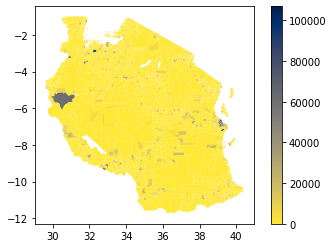

In [233]:
wards_pop_gdf.plot("urban_both", cmap="cividis_r", legend=True)

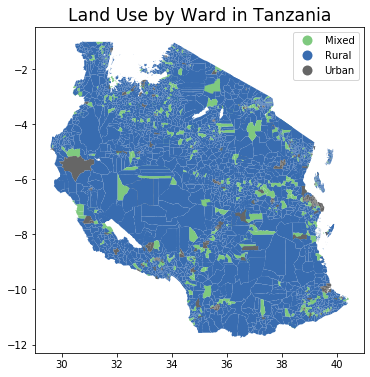

In [286]:
fig, ax = plt.subplots(figsize=(6,6))

wards_pop_gdf.plot("ward_type", cmap="Accent", legend=True, ax=ax)

plt.title("Land Use by Ward in Tanzania", size="xx-large")

plt.savefig("land-use-by-ward.png", dpi=300)

In [44]:
train.shape

(47520, 46)

In [45]:
train["ward"]

43360       Kiwira
7263      Imalinyi
2486        Mbwewe
313       Isingiro
52726       Nondwa
           ...    
9795       Sindeni
58170      Bujonde
17191       Mchemo
8192     Kitangari
49783       Mzumbe
Name: ward, Length: 47520, dtype: object

In [115]:
wards_and_soils_gdf = gpd.sjoin(wards_gdf.to_crs(soils_gdf.crs), soils_gdf)

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [55]:
wards_and_soils_gdf.head()

,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry,index_right,id,AREA,PERIMETER,SOIL_TYPE,MAIN_TYPE
0,01,Dodoma,01,Kondoa,011,Bumbuta,None,0.769320,0.015383,"POLYGON ((35.93797 -4.59965, 35.93713 -4.60184...",148,tza_tanzania_soil.141,4.32392,31.87185,LVx2,Chromic Luvisols
1,01,Dodoma,01,Kondoa,021,Pahi,None,0.450216,0.008900,"POLYGON ((35.93538 -4.61442, 35.93383 -4.61865...",148,tza_tanzania_soil.141,4.32392,31.87185,LVx2,Chromic Luvisols
2,01,Dodoma,01,Kondoa,041,Haubi,None,0.538672,0.012175,"POLYGON ((35.92090 -4.75030, 35.92693 -4.75039...",148,tza_tanzania_soil.141,4.32392,31.87185,LVx2,Chromic Luvisols
4,01,Dodoma,01,Kondoa,061,Kwadelo,None,0.721114,0.025358,"POLYGON ((36.33740 -4.84817, 36.33773 -4.85056...",148,tza_tanzania_soil.141,4.32392,31.87185,LVx2,Chromic Luvisols
5,01,Dodoma,01,Kondoa,071,Masange,None,0.309470,0.004171,"POLYGON ((35.87262 -4.54533, 35.87248 -4.54683...",148,tza_tanzania_soil.141,4.32392,31.87185,LVx2,Chromic Luvisols


In [116]:
ws_gdf = wards_and_soils_gdf[["Ward_Name","District_N","Region_Nam","MAIN_TYPE"]]
ws_gdf

,Ward_Name,District_N,Region_Nam,MAIN_TYPE
0,Bumbuta,Kondoa,Dodoma,Chromic Luvisols
1,Pahi,Kondoa,Dodoma,Chromic Luvisols
2,Haubi,Kondoa,Dodoma,Chromic Luvisols
4,Kwadelo,Kondoa,Dodoma,Chromic Luvisols
5,Masange,Kondoa,Dodoma,Chromic Luvisols
...,...,...,...,...
3584,Kisiwa Panza,Mkoani,Kusini Pemba,
3586,Kengeja,Mkoani,Kusini Pemba,
3587,Muambe,Mkoani,Kusini Pemba,
3603,Shamiani,Mkoani,Kusini Pemba,


In [117]:
train.shape

(47620, 48)

In [118]:
train_df = ws_gdf.join(train, how="right")
train_df.shape

(52241, 52)

In [119]:
validate_df = ws_gdf.join(validate, how="right")
validate_df.shape

(16503, 52)

In [120]:
test_df = ws_gdf.join(test, how="right")
test_df.shape

(18985, 51)

In [121]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train_df.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality<=50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features 

In [122]:
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'years',
 'elevation',
 'Region_Nam',
 'MAIN_TYPE',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING']

In [123]:
# Arrange data into X features matrix and y target vector 
X_train = train_df[features]
y_train = train_df[target]
X_validate = validate_df[features]
y_validate = validate_df[target]
X_test = test_df[features]

In [76]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [125]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    RandomForestClassifier(random_state=0, n_jobs=-2, max_features="auto", n_estimators=1000, max_depth=32, min_samples_leaf=2))
    
%time
pipeline.fit(X_train, y_train)
print("RandomForestClassifier. n_estimators=1000 Training accuracy:", pipeline.score(X_train, y_train))
print("RandomForestClassifier, n_estimators=1000 Validation accuracy:", pipeline.score(X_validate, y_validate))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
RandomForestClassifier. n_estimators=1000 Training accuracy: 0.9383243046649183
RandomForestClassifier, n_estimators=1000 Validation accuracy: 0.8106404896079501


In [85]:
from sklearn.neural_network import MLPClassifier

In [89]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    MLPClassifier(random_state=0, learning_rate="adaptive")
)
    
%time
pipeline.fit(X_train, y_train)
print("RandomForestClassifier. n_estimators=1000 Training accuracy:", pipeline.score(X_train, y_train))
print("RandomForestClassifier, n_estimators=1000 Validation accuracy:", pipeline.score(X_validate, y_validate))

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 17.9 µs
RandomForestClassifier. n_estimators=1000 Training accuracy: 0.6814314704964096
RandomForestClassifier, n_estimators=1000 Validation accuracy: 0.6923197369451186


In [95]:
from sklearn.ensemble import ExtraTreesClassifier

In [96]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    ExtraTreesClassifier(random_state=0, n_jobs=-2, max_features="auto", n_estimators=200, max_depth=32, min_samples_leaf=2))
    
%time
pipeline.fit(X_train, y_train)
print("RandomForestClassifier. n_estimators=1000 Training accuracy:", pipeline.score(X_train, y_train))
print("RandomForestClassifier, n_estimators=1000 Validation accuracy:", pipeline.score(X_validate, y_validate))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
RandomForestClassifier. n_estimators=1000 Training accuracy: 0.9044840774274118
RandomForestClassifier, n_estimators=1000 Validation accuracy: 0.8078759884130587


In [103]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
estimators = [('rfc', RandomForestClassifier(random_state=0, n_jobs=-2, max_features="auto", n_estimators=200, max_depth=32, min_samples_leaf=2)),

              ('another_rfc', LogisticRegression(random_state=42))]

In [110]:
clas = StackingClassifier(

    estimators=estimators,

    final_estimator=RandomForestClassifier(random_state=42))

TypeError: __init__() got an unexpected keyword argument 'max_iter'

In [109]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    clas)
    
%time
pipeline.fit(X_train, y_train)
print("RandomForestClassifier. n_estimators=1000 Training accuracy:", pipeline.score(X_train, y_train))
print("RandomForestClassifier, n_estimators=1000 Validation accuracy:", pipeline.score(X_validate, y_validate))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

RandomForestClassifier. n_estimators=1000 Training accuracy: 0.9073134561348736
RandomForestClassifier, n_estimators=1000 Validation accuracy: 0.7996555233696078
